In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath('F:/portneuf/analysis/utils/'))
import trend_sen


In [3]:
df = pd.read_csv('gridMET_3p_monthly_stats.csv')

In [4]:
df

,Date,UID,pr,etr,eto,tmmn,tmmx,rmin,pr_1,etr_1,eto_1,tmmn_1,tmmx_1,rmin_1
0,1979-01-01,101,42.926928,21.241046,14.192750,253.807426,266.309324,48.057390,75.300661,22.483027,14.999475,255.135035,266.086325,48.144490
1,1979-01-01,102,56.488250,23.469283,15.632835,255.986846,267.608307,48.654885,80.615037,23.880381,15.920392,256.548532,267.157547,49.168412
2,1979-01-01,103,35.090157,16.498415,11.520756,256.047141,266.755732,53.421299,60.936417,19.475505,13.300968,256.310592,266.789478,51.195139
3,1979-02-01,101,42.372144,47.629362,32.663643,263.951960,273.999624,47.523589,67.982939,49.537733,33.945271,265.150648,273.767104,47.770893
4,1979-02-01,102,46.710880,45.713792,32.010360,265.282755,275.121411,49.797932,66.926248,47.334859,32.991077,265.940168,274.621528,49.717556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2024-11-01,102,25.738461,52.869231,34.207692,267.336412,278.683587,46.446154,45.040173,47.603865,31.017965,268.035012,277.082509,52.255692
1652,2024-11-01,103,20.189163,45.872040,30.032121,268.815608,279.336876,46.432351,39.977134,44.580393,29.259373,269.051908,277.802996,51.296560
1653,2024-12-01,101,52.858668,32.875531,20.674666,265.511315,275.117477,56.033228,103.699205,30.712557,19.488380,266.802983,274.937549,59.614549
1654,2024-12-01,102,63.407692,38.161538,24.000000,267.364619,277.299227,53.251538,99.864542,33.017937,21.028677,268.173518,276.283309,59.706056


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1656 non-null   object 
 1   UID     1656 non-null   int64  
 2   pr      1656 non-null   float64
 3   etr     1656 non-null   float64
 4   eto     1656 non-null   float64
 5   tmmn    1656 non-null   float64
 6   tmmx    1656 non-null   float64
 7   rmin    1656 non-null   float64
 8   pr_1    1656 non-null   float64
 9   etr_1   1656 non-null   float64
 10  eto_1   1656 non-null   float64
 11  tmmn_1  1656 non-null   float64
 12  tmmx_1  1656 non-null   float64
 13  rmin_1  1656 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 181.3+ KB


In [6]:
df['tmmn'] = df['tmmn'] - 273.15
df['tmmx'] = df['tmmx'] - 273.15
df['tmean'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['tmmn_1'] = df['tmmn_1'] - 273.15
df['tmmx_1'] = df['tmmx_1'] - 273.15
df['tmean_1'] = df[['tmmn_1', 'tmmx_1']].mean(axis=1)

In [7]:
df

,Date,UID,pr,etr,eto,tmmn,tmmx,rmin,pr_1,etr_1,eto_1,tmmn_1,tmmx_1,rmin_1,tmean,tmean_1
0,1979-01-01,101,42.926928,21.241046,14.192750,-19.342574,-6.840676,48.057390,75.300661,22.483027,14.999475,-18.014965,-7.063675,48.144490,-13.091625,-12.539320
1,1979-01-01,102,56.488250,23.469283,15.632835,-17.163154,-5.541693,48.654885,80.615037,23.880381,15.920392,-16.601468,-5.992453,49.168412,-11.352424,-11.296960
2,1979-01-01,103,35.090157,16.498415,11.520756,-17.102859,-6.394268,53.421299,60.936417,19.475505,13.300968,-16.839408,-6.360522,51.195139,-11.748563,-11.599965
3,1979-02-01,101,42.372144,47.629362,32.663643,-9.198040,0.849624,47.523589,67.982939,49.537733,33.945271,-7.999352,0.617104,47.770893,-4.174208,-3.691124
4,1979-02-01,102,46.710880,45.713792,32.010360,-7.867245,1.971411,49.797932,66.926248,47.334859,32.991077,-7.209832,1.471528,49.717556,-2.947917,-2.869152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2024-11-01,102,25.738461,52.869231,34.207692,-5.813588,5.533587,46.446154,45.040173,47.603865,31.017965,-5.114988,3.932509,52.255692,-0.140001,-0.591240
1652,2024-11-01,103,20.189163,45.872040,30.032121,-4.334392,6.186876,46.432351,39.977134,44.580393,29.259373,-4.098092,4.652996,51.296560,0.926242,0.277452
1653,2024-12-01,101,52.858668,32.875531,20.674666,-7.638685,1.967477,56.033228,103.699205,30.712557,19.488380,-6.347017,1.787549,59.614549,-2.835604,-2.279734
1654,2024-12-01,102,63.407692,38.161538,24.000000,-5.785381,4.149227,53.251538,99.864542,33.017937,21.028677,-4.976482,3.133309,59.706056,-0.818077,-0.921587


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df[['month', 'year', 'irr_year']] = df.apply(trend_sen.irr_year, axis=1, result_type='expand')

In [9]:
df.columns

Index(['Date', 'UID', 'pr', 'etr', 'eto', 'tmmn', 'tmmx', 'rmin', 'pr_1',
       'etr_1', 'eto_1', 'tmmn_1', 'tmmx_1', 'rmin_1', 'tmean', 'tmean_1',
       'month', 'year', 'irr_year'],
      dtype='object')

<Axes: >

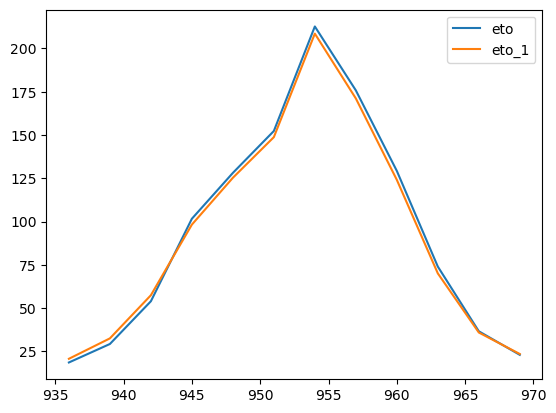

In [10]:
df[(df['year'] == 2005) & (df['UID'] == 101)][['eto', 'eto_1']].plot()

In [11]:
df_iy = df[(df['irr_year'] >1979) & (df['irr_year'] <=2024)]

In [12]:
df_iy

,Date,UID,pr,etr,eto,tmmn,tmmx,rmin,pr_1,etr_1,eto_1,tmmn_1,tmmx_1,rmin_1,tmean,tmean_1,month,year,irr_year
30,1979-11-01,101,20.685777,40.522275,26.716220,-10.169130,2.936022,43.015876,30.659259,38.368731,25.511394,-9.376071,1.843549,46.294636,-3.616554,-3.766261,11,1979,1980
31,1979-11-01,102,29.877375,44.924230,29.447831,-8.740494,4.078936,42.379917,36.644985,40.254994,26.750314,-8.447974,2.633911,46.951396,-2.330779,-2.907031,11,1979,1980
32,1979-11-01,103,26.163153,38.779411,25.797806,-8.212647,3.975833,45.485134,29.154490,37.294556,24.974901,-8.224063,2.920765,47.893032,-2.118407,-2.651649,11,1979,1980
33,1979-12-01,101,10.966976,47.841526,29.516021,-9.239108,3.085775,42.876647,16.112288,45.041470,27.891508,-7.994645,2.490251,46.126701,-3.076666,-2.752197,12,1979,1980
34,1979-12-01,102,11.152944,42.497294,26.509733,-8.108719,3.493461,48.400062,14.640875,41.340301,25.903553,-7.245238,2.946307,50.762901,-2.307629,-2.149465,12,1979,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2024-09-01,102,21.276923,204.507692,141.007692,6.513077,25.507694,21.544615,25.850668,193.157798,134.700812,8.350780,23.561810,24.451067,16.010385,15.956295,9,2024,2024
1646,2024-09-01,103,19.975064,188.375513,131.860215,7.362647,25.503169,22.750007,26.019896,185.864725,130.578804,8.677189,23.970459,24.720599,16.432908,16.323824,9,2024,2024
1647,2024-10-01,101,20.274141,138.921951,91.383714,0.079200,17.669041,25.752154,25.987024,133.390019,88.188751,1.955959,16.383169,26.592560,8.874120,9.169564,10,2024,2024
1648,2024-10-01,102,20.230769,147.476923,96.423077,0.983749,19.306327,22.879157,25.159988,138.839932,91.464320,2.997804,17.140208,26.082869,10.145038,10.069006,10,2024,2024


<Axes: >

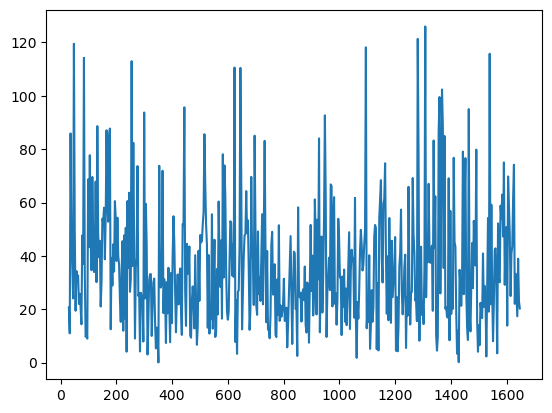

In [13]:
df_iy[df_iy['UID'] ==101]['pr'].plot()

In [14]:
#seasonal variability
agg_irr_year = df_iy.groupby(['UID', 'irr_year']).agg(
    # Cultivated
    ppt_total=('pr', 'sum'),
    ppt_std=('pr', 'std'),
    ppt_cv=('pr', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmin_mean=('tmmn', 'mean'),
    tmin_std=('tmmn', 'std'),
    tmin_cv=('tmmn', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmax_mean=('tmmx', 'mean'),
    tmax_std=('tmmx', 'std'),
    tmax_cv=('tmmx', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    rmin_mean=('rmin', 'mean'),
    rmin_std=('rmin', 'std'),
    rmin_cv=('rmin', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    etr_mean=('etr', 'sum'),
    etr_std=('etr', 'std'),
    etr_cv=('etr', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    eto_mean=('eto', 'sum'),
    eto_std=('eto', 'std'),
    eto_cv=('eto', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    # Non-Cultivated
    ppt_total_nc=('pr_1', 'sum'),
    ppt_std_nc=('pr_1', 'std'),
    ppt_cv_nc=('pr_1', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmin_mean_nc=('tmmn_1', 'mean'),
    tmin_std_nc=('tmmn_1', 'std'),
    tmin_cv_nc=('tmmn_1', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmax_mean_nc=('tmmx_1', 'mean'),
    tmax_std_nc=('tmmx_1', 'std'),
    tmax_cv_nc=('tmmx_1', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    rmin_mean_nc=('rmin_1', 'mean'),
    rmin_std_nc=('rmin_1', 'std'),
    rmin_cv_nc=('rmin_1', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    etr_mean_nc=('etr_1', 'sum'),
    etr_std_nc=('etr_1', 'std'),
    etr_cv_nc=('etr_1', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    eto_mean_nc=('eto_1', 'sum'),
    eto_std_nc=('eto_1', 'std'),
    eto_cv_nc=('eto_1', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan)
).reset_index()

# interannual variability
agg_long_term = agg_irr_year.groupby('UID').agg(
    # Cultivated
    ppt_mean=('ppt_total', 'mean'),
    ppt_std=('ppt_total', 'std'),
    ppt_cv=('ppt_total', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmin_mean=('tmin_mean', 'mean'),
    tmin_std=('tmin_mean', 'std'),
    tmin_cv=('tmin_mean', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmax_mean=('tmax_mean', 'mean'),
    tmax_std=('tmax_mean', 'std'),
    tmax_cv=('tmax_mean', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    rmin_mean=('rmin_mean', 'mean'),
    rmin_std=('rmin_mean', 'std'),
    rmin_cv=('rmin_mean', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    etr_mean=('etr_mean', 'mean'),
    etr_std=('etr_mean', 'std'),
    etr_cv=('etr_mean', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    eto_mean=('eto_mean', 'mean'),
    eto_std=('eto_mean', 'std'),
    eto_cv=('eto_mean', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    # Non-Cultivated
    ppt_mean_nc=('ppt_total_nc', 'mean'),
    ppt_std_nc=('ppt_total_nc', 'std'),
    ppt_cv_nc=('ppt_total_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmin_mean_nc=('tmin_mean_nc', 'mean'),
    tmin_std_nc=('tmin_mean_nc', 'std'),
    tmin_cv_nc=('tmin_mean_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmax_mean_nc=('tmax_mean_nc', 'mean'),
    tmax_std_nc=('tmax_mean_nc', 'std'),
    tmax_cv_nc=('tmax_mean_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    rmin_mean_nc=('rmin_mean_nc', 'mean'),
    rmin_std_nc=('rmin_mean_nc', 'std'),
    rmin_cv_nc=('rmin_mean_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    etr_mean_nc=('etr_mean_nc', 'mean'),
    etr_std_nc=('etr_mean_nc', 'std'),
    etr_cv_nc=('etr_mean_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    eto_mean_nc=('eto_mean_nc', 'mean'),
    eto_std_nc=('eto_mean_nc', 'std'),
    eto_cv_nc=('eto_mean_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan)
).reset_index()


In [15]:
agg_irr_year

,UID,irr_year,ppt_total,ppt_std,ppt_cv,tmin_mean,tmin_std,tmin_cv,tmax_mean,tmax_std,...,tmax_cv_nc,rmin_mean_nc,rmin_std_nc,rmin_cv_nc,etr_mean_nc,etr_std_nc,etr_cv_nc,eto_mean_nc,eto_std_nc,eto_cv_nc
0,101,1980,510.043507,30.928208,0.727660,-1.713037,7.115859,-4.153943,13.340409,10.215407,...,0.805650,34.456015,10.253409,0.297580,1535.705873,80.944140,0.632497,1117.988710,61.543220,0.660578
1,101,1981,412.679947,30.712502,0.893065,-0.646102,6.641655,-10.279569,14.816175,10.018918,...,0.709386,33.191351,11.375439,0.342723,1613.775401,88.070743,0.654892,1168.621235,66.162960,0.679395
2,101,1982,627.336885,19.083532,0.365039,-1.414193,7.795030,-5.512000,12.538201,10.469274,...,0.882948,37.511544,10.301727,0.274628,1423.012556,74.327549,0.626790,1052.471710,58.434585,0.666255
3,101,1983,594.881343,16.795212,0.338795,-0.438666,7.268963,-16.570598,12.719658,10.412575,...,0.858879,39.675076,11.754839,0.296278,1409.508873,78.961883,0.672250,1044.603139,60.466493,0.694616
4,101,1984,578.539892,21.843738,0.453080,-2.567156,8.665065,-3.375356,11.229541,11.554088,...,1.077811,41.673478,12.378701,0.297040,1345.014913,78.349062,0.699017,1003.803385,60.802007,0.726860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,103,2020,266.628604,17.820713,0.802047,0.774799,6.987630,9.018640,15.535962,10.631370,...,0.728049,37.461727,15.406493,0.411260,1601.879734,84.775861,0.635073,1167.992755,64.359676,0.661234
131,103,2021,269.806421,17.595434,0.782580,1.465937,7.757299,5.291700,15.949086,11.227856,...,0.750170,37.588239,15.270454,0.406256,1647.276152,90.725225,0.660911,1200.407386,69.128124,0.691047
132,103,2022,252.575423,12.195790,0.579429,0.552945,8.333184,15.070549,15.238823,11.903559,...,0.794567,38.550395,14.248544,0.369608,1551.161238,84.770953,0.655800,1137.980144,64.761424,0.682909
133,103,2023,416.694417,15.532708,0.447312,0.013914,8.920052,641.071327,13.466428,12.343103,...,0.957026,45.325400,16.648016,0.367300,1363.186258,87.031454,0.766130,1026.157784,66.515319,0.777837


In [16]:
agg_uid_bas = agg_irr_year.groupby('irr_year').agg(
    # Cultivated
    ppt_bas_total=('ppt_total', 'mean'),
    ppt_bas_std=('ppt_total', 'std'),
    ppt_bas_cv=('ppt_total', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmin_bas_mean=('tmin_mean', 'mean'),
    tmin_bas_std=('tmin_mean', 'std'),
    tmin_bas_cv=('tmin_mean', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmax_bas_mean=('tmax_mean', 'mean'),
    tmax_bas_std=('tmax_mean', 'std'),
    tmax_bas_cv=('tmax_mean', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    rmin_bas_mean=('rmin_mean', 'mean'),
    rmin_bas_std=('rmin_mean', 'std'),
    rmin_bas_cv=('rmin_mean', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    etr_bas_total=('etr_mean', 'mean'),
    etr_bas_std=('etr_mean', 'std'),
    etr_bas_cv=('etr_mean', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    eto_bas_total=('eto_mean', 'mean'),
    eto_bas_std=('eto_mean', 'std'),
    eto_bas_cv=('eto_mean', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    # Non-Cultivated
    ppt_bas_total_nc=('ppt_total_nc', 'mean'),
    ppt_bas_std_nc=('ppt_total_nc', 'std'),
    ppt_bas_cv_nc=('ppt_total_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmin_bas_mean_nc=('tmin_mean_nc', 'mean'),
    tmin_bas_std_nc=('tmin_mean_nc', 'std'),
    tmin_bas_cv_nc=('tmin_mean_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    tmax_bas_mean_nc=('tmax_mean_nc', 'mean'),
    tmax_bas_std_nc=('tmax_mean_nc', 'std'),
    tmax_bas_cv_nc=('tmax_mean_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    rmin_bas_mean_nc=('rmin_mean_nc', 'mean'),
    rmin_bas_std_nc=('rmin_mean_nc', 'std'),
    rmin_bas_cv_nc=('rmin_mean_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    etr_bas_total_nc=('etr_mean_nc', 'mean'),
    etr_bas_std_nc=('etr_mean_nc', 'std'),
    etr_bas_cv_nc=('etr_mean_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan),

    eto_bas_total_nc=('eto_mean_nc', 'mean'),
    eto_bas_std_nc=('eto_mean_nc', 'std'),
    eto_bas_cv_nc=('eto_mean_nc', lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan)
).reset_index()


In [17]:
agg_uid_bas

,irr_year,ppt_bas_total,ppt_bas_std,ppt_bas_cv,tmin_bas_mean,tmin_bas_std,tmin_bas_cv,tmax_bas_mean,tmax_bas_std,tmax_bas_cv,...,tmax_bas_cv_nc,rmin_bas_mean_nc,rmin_bas_std_nc,rmin_bas_cv_nc,etr_bas_total_nc,etr_bas_std_nc,etr_bas_cv_nc,eto_bas_total_nc,eto_bas_std_nc,eto_bas_cv_nc
0,1980,508.133517,84.052120,0.165413,-0.352757,1.241054,-3.518154,14.191917,0.738597,0.052043,...,0.050130,35.137338,0.630699,0.017950,1551.828218,35.151460,0.022652,1130.738270,21.343631,0.018876
1,1981,383.078045,70.020593,0.182784,0.488429,1.003660,2.054875,15.569628,0.653023,0.041942,...,0.042168,34.071636,0.773550,0.022704,1629.844020,35.474429,0.021766,1181.039885,22.037605,0.018659
2,1982,606.995475,140.947174,0.232205,-0.341687,0.946587,-2.770330,13.424041,0.776923,0.057876,...,0.055923,38.220695,0.666531,0.017439,1435.968571,25.925499,0.018054,1063.901761,16.733527,0.015728
3,1983,572.219376,136.773289,0.239022,0.628925,0.944288,1.501433,13.697435,0.875209,0.063896,...,0.060984,39.907538,0.268754,0.006734,1427.462795,26.444404,0.018525,1058.702167,16.899474,0.015962
4,1984,568.372573,114.172616,0.200876,-1.330459,1.100510,-0.827166,12.094937,0.758559,0.062717,...,0.063304,42.232632,0.494364,0.011706,1371.225054,26.956301,0.019659,1023.028360,18.567182,0.018149
5,1985,360.698734,78.683497,0.218142,-2.237396,1.001798,-0.447752,13.105390,0.721416,0.055047,...,0.057298,36.036188,0.570895,0.015842,1572.786613,36.655680,0.023306,1147.807052,23.366693,0.020358
6,1986,534.827275,139.069747,0.260027,-0.484190,0.912358,-1.884297,13.888653,0.695727,0.050093,...,0.056429,39.255296,0.419657,0.010690,1500.123835,35.996761,0.023996,1106.009805,22.934407,0.020736
7,1987,328.971980,73.995013,0.224928,-0.403797,1.185181,-2.935094,15.645000,0.756572,0.048359,...,0.053768,31.961016,0.433961,0.013578,1633.036835,36.886258,0.022588,1188.701511,23.392288,0.019679
8,1988,219.001056,57.427725,0.262226,-0.225690,1.300466,-5.762186,15.831543,0.830543,0.052461,...,0.054109,32.576334,0.345546,0.010607,1779.358894,28.811520,0.016192,1271.512988,19.127292,0.015043
9,1989,384.785438,73.616679,0.191319,-0.872997,1.051258,-1.204193,13.763997,0.582336,0.042309,...,0.047546,36.767376,0.739903,0.020124,1579.847242,31.270267,0.019793,1151.620896,19.226764,0.016695


In [18]:
def plot_timeseries_with_std(df, year_col, mean_col, std_col, ylabel, title, color='tab:green', color2='tab:red', save_path=None):
    years = df[year_col]
    mean = df[mean_col]
    std = df[std_col]
    mean_nc = df[f'{mean_col}_nc']
    std_nc = df[f'{std_col}_nc']

    fig, ax = plt.subplots(figsize=(10, 6))

    # Fill ±1 std
    ax.fill_between(years, mean - std, mean + std, color=color, alpha=0.3, label='±1 Std Dev')
    ax.fill_between(years, mean_nc - std_nc, mean_nc + std_nc, color=color2, alpha=0.3, label='±1 Std Dev')

    # Plot mean line
    ax.plot(years, mean, color=color, marker='o', label='Mean (cultivated+pasture)')
    ax.plot(years, mean_nc, color=color2, marker='o', label='Mean (others)')

    # Labels and aesthetics
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Irrigation Year")
    ax.set_ylabel(ylabel)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()
    ax.set_axisbelow(True)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {save_path}")
    
    plt.show()


In [19]:
agg_uid_bas.columns

Index(['irr_year', 'ppt_bas_total', 'ppt_bas_std', 'ppt_bas_cv',
       'tmin_bas_mean', 'tmin_bas_std', 'tmin_bas_cv', 'tmax_bas_mean',
       'tmax_bas_std', 'tmax_bas_cv', 'rmin_bas_mean', 'rmin_bas_std',
       'rmin_bas_cv', 'etr_bas_total', 'etr_bas_std', 'etr_bas_cv',
       'eto_bas_total', 'eto_bas_std', 'eto_bas_cv', 'ppt_bas_total_nc',
       'ppt_bas_std_nc', 'ppt_bas_cv_nc', 'tmin_bas_mean_nc',
       'tmin_bas_std_nc', 'tmin_bas_cv_nc', 'tmax_bas_mean_nc',
       'tmax_bas_std_nc', 'tmax_bas_cv_nc', 'rmin_bas_mean_nc',
       'rmin_bas_std_nc', 'rmin_bas_cv_nc', 'etr_bas_total_nc',
       'etr_bas_std_nc', 'etr_bas_cv_nc', 'eto_bas_total_nc', 'eto_bas_std_nc',
       'eto_bas_cv_nc'],
      dtype='object')

Saved: graphics/annual_ppt_bas_c_nc.png


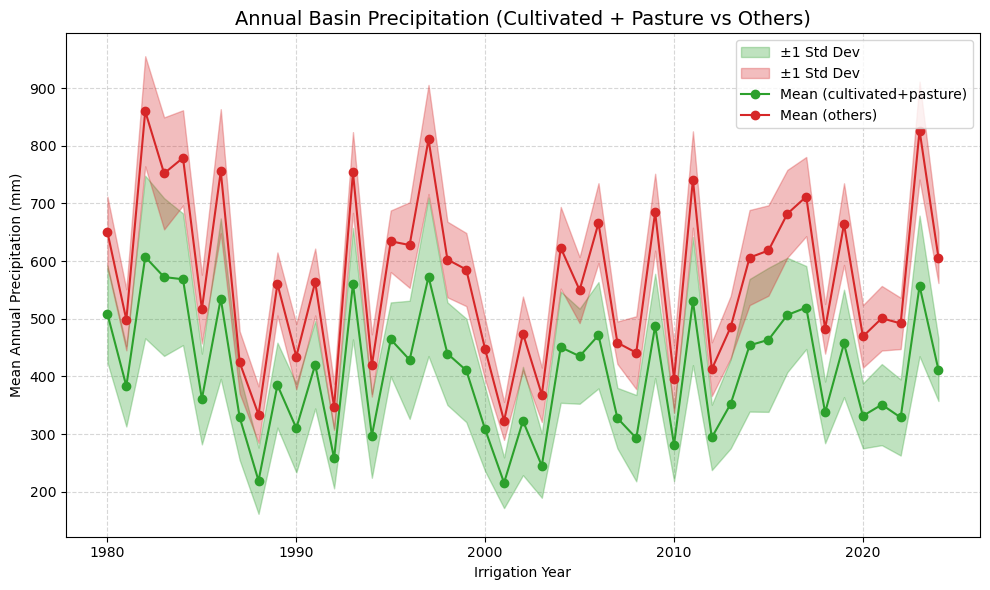

In [21]:
plot_timeseries_with_std(
    df=agg_uid_bas,
    year_col='irr_year',
    mean_col='ppt_bas_total',
    std_col='ppt_bas_std',
    ylabel='Mean Annual Precipitation (mm)',
    title='Annual Basin Precipitation (Cultivated + Pasture vs Others)',
    save_path='graphics/annual_ppt_bas_c_nc.png'
)

Saved: graphics/annual_etr_bas_c_nc.png


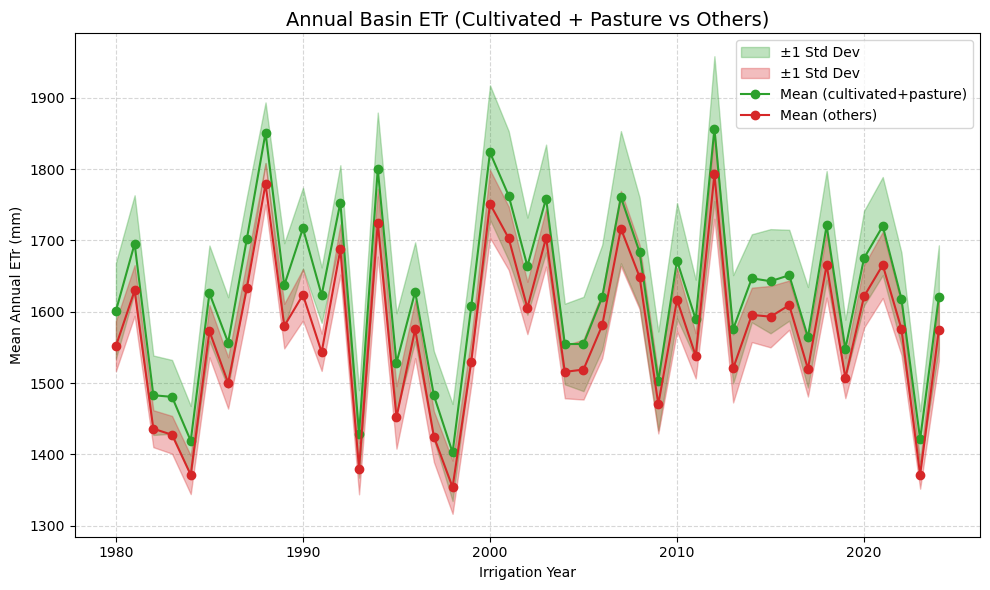

In [23]:
plot_timeseries_with_std(
    df=agg_uid_bas,
    year_col='irr_year',
    mean_col='etr_bas_total',
    std_col='etr_bas_std',
    ylabel='Mean Annual ETr (mm)',
    title='Annual Basin ETr (Cultivated + Pasture vs Others)',
    save_path='graphics/annual_etr_bas_c_nc.png'
)

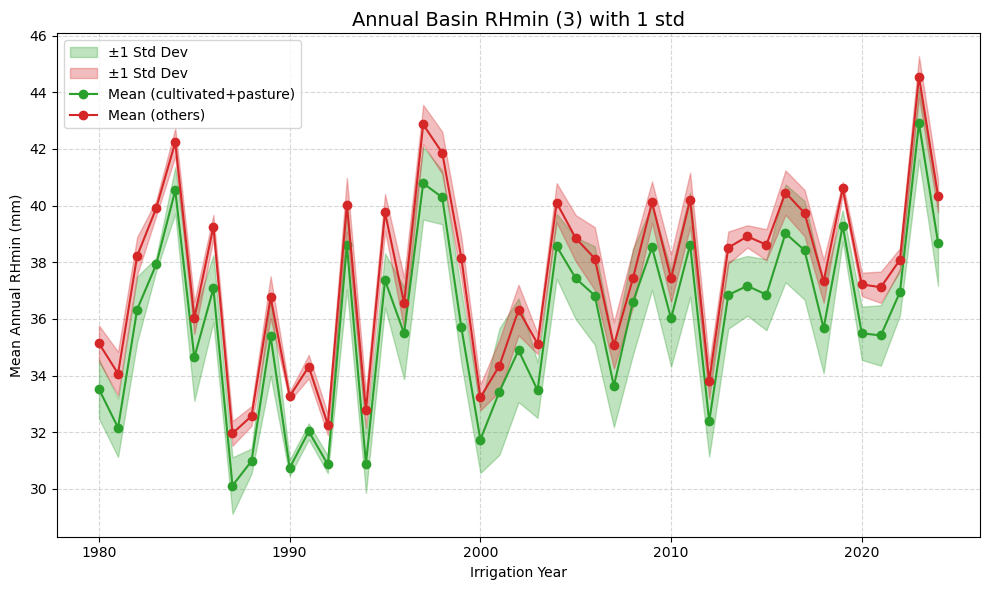

In [ ]:
plot_timeseries_with_std(
    df=agg_uid_bas,
    year_col='irr_year',
    mean_col='rmin_bas_mean',
    std_col='rmin_bas_std',
    ylabel='Mean Annual RHmin (mm)',
    title='Annual Basin RHmin (3) with 1 std',
    save_path=None#'graphics/annual_ppt_huc8_gmet.png'
)

In [ ]:
df

,Date,UID,pr,etr,eto,tmmn,tmmx,rmin,pr_1,etr_1,eto_1,tmmn_1,tmmx_1,rmin_1,tmean,tmean_1,month,year,irr_year
0,1979-01-01,101,42.926928,21.241046,14.192750,-19.342574,-6.840676,48.057390,75.300661,22.483027,14.999475,-18.014965,-7.063675,48.144490,-13.091625,-12.539320,1,1979,1979
1,1979-01-01,102,56.488250,23.469283,15.632835,-17.163154,-5.541693,48.654885,80.615037,23.880381,15.920392,-16.601468,-5.992453,49.168412,-11.352424,-11.296960,1,1979,1979
2,1979-01-01,103,35.090157,16.498415,11.520756,-17.102859,-6.394268,53.421299,60.936417,19.475505,13.300968,-16.839408,-6.360522,51.195139,-11.748563,-11.599965,1,1979,1979
3,1979-02-01,101,42.372144,47.629362,32.663643,-9.198040,0.849624,47.523589,67.982939,49.537733,33.945271,-7.999352,0.617104,47.770893,-4.174208,-3.691124,2,1979,1979
4,1979-02-01,102,46.710880,45.713792,32.010360,-7.867245,1.971411,49.797932,66.926248,47.334859,32.991077,-7.209832,1.471528,49.717556,-2.947917,-2.869152,2,1979,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2024-11-01,102,25.738461,52.869231,34.207692,-5.813588,5.533587,46.446154,45.040173,47.603865,31.017965,-5.114988,3.932509,52.255692,-0.140001,-0.591240,11,2024,2025
1652,2024-11-01,103,20.189163,45.872040,30.032121,-4.334392,6.186876,46.432351,39.977134,44.580393,29.259373,-4.098092,4.652996,51.296560,0.926242,0.277452,11,2024,2025
1653,2024-12-01,101,52.858668,32.875531,20.674666,-7.638685,1.967477,56.033228,103.699205,30.712557,19.488380,-6.347017,1.787549,59.614549,-2.835604,-2.279734,12,2024,2025
1654,2024-12-01,102,63.407692,38.161538,24.000000,-5.785381,4.149227,53.251538,99.864542,33.017937,21.028677,-4.976482,3.133309,59.706056,-0.818077,-0.921587,12,2024,2025


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1656 non-null   datetime64[ns]
 1   UID       1656 non-null   int64         
 2   pr        1656 non-null   float64       
 3   etr       1656 non-null   float64       
 4   eto       1656 non-null   float64       
 5   tmmn      1656 non-null   float64       
 6   tmmx      1656 non-null   float64       
 7   rmin      1656 non-null   float64       
 8   pr_1      1656 non-null   float64       
 9   etr_1     1656 non-null   float64       
 10  eto_1     1656 non-null   float64       
 11  tmmn_1    1656 non-null   float64       
 12  tmmx_1    1656 non-null   float64       
 13  rmin_1    1656 non-null   float64       
 14  tmean     1656 non-null   float64       
 15  tmean_1   1656 non-null   float64       
 16  month     1656 non-null   int64         
 17  year      1656

In [ ]:
base_vars = ['pr', 'etr', 'eto', 'tmmn', 'tmmx', 'rmin', 'tmean']
id_vars = ['Date', 'UID', 'month', 'year', 'irr_year']

melted_dfs = []

for var in base_vars:
    melted = pd.melt(
        df,
        id_vars=id_vars,
        value_vars=[var, f"{var}_1"],
        var_name='variable',
        value_name='value'
    )
    melted['land_type'] = melted['variable'].apply(lambda x: 'Cultivated' if not x.endswith('_1') else 'Non-Cultivated')
    melted['variable'] = var  # standardize variable name
    melted_dfs.append(melted)
df_melted  = pd.concat(melted_dfs, ignore_index=True)


In [ ]:
df_melted 

,Date,UID,month,year,irr_year,variable,value,land_type
0,1979-01-01,101,1,1979,1979,pr,42.926928,Cultivated
1,1979-01-01,102,1,1979,1979,pr,56.488250,Cultivated
2,1979-01-01,103,1,1979,1979,pr,35.090157,Cultivated
3,1979-02-01,101,2,1979,1979,pr,42.372144,Cultivated
4,1979-02-01,102,2,1979,1979,pr,46.710880,Cultivated
...,...,...,...,...,...,...,...,...
23179,2024-11-01,102,11,2024,2025,tmean,-0.591240,Non-Cultivated
23180,2024-11-01,103,11,2024,2025,tmean,0.277452,Non-Cultivated
23181,2024-12-01,101,12,2024,2025,tmean,-2.279734,Non-Cultivated
23182,2024-12-01,102,12,2024,2025,tmean,-0.921587,Non-Cultivated


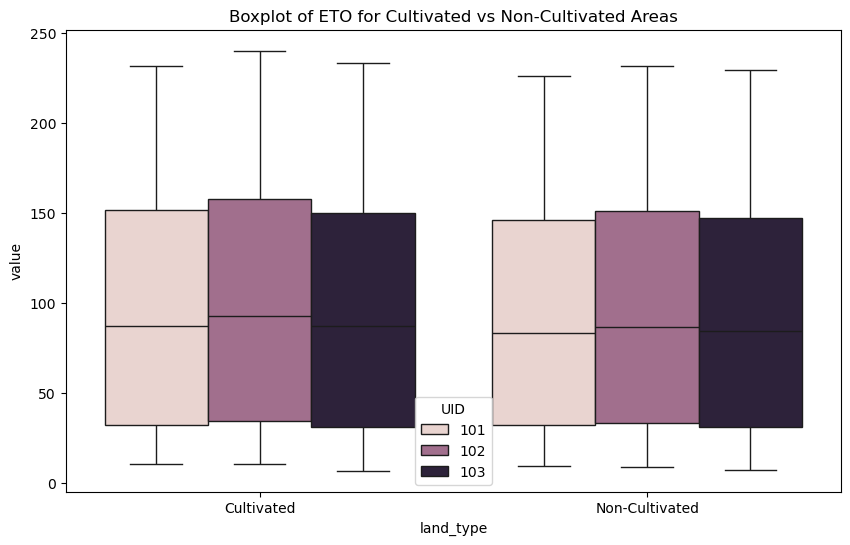

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted[df_melted['variable'] == 'eto'], x='land_type', y='value', hue='UID')
plt.title('Boxplot of ETO for Cultivated vs Non-Cultivated Areas')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted[df_melted['variable'] == 'eto'], x='land_type', y='value', hue='UID')
plt.title('Boxplot of ETO for Cultivated vs Non-Cultivated Areas')
plt.show()


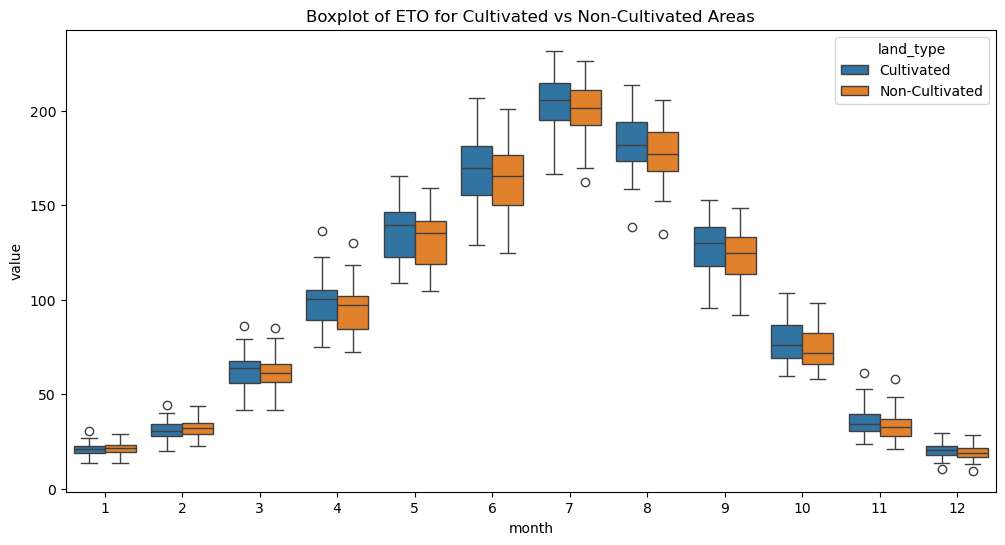

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted[(df_melted['variable'] == 'eto') & (df_melted['UID'] == 101)], 
            x='month', y='value', hue='land_type')
plt.title('ETO for Cultivated vs Non-Cultivated Areas')
plt.show()


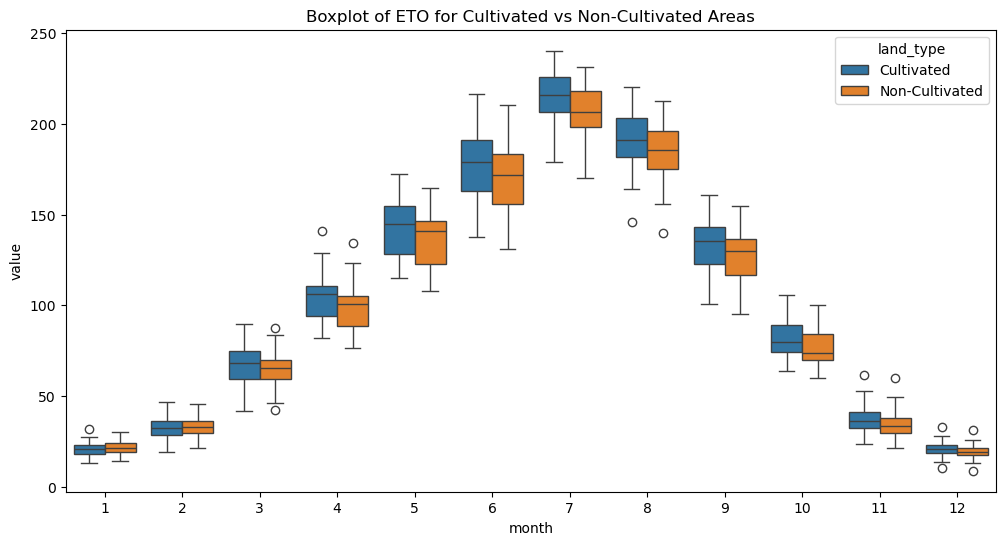

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted[(df_melted['variable'] == 'eto') & (df_melted['UID'] == 102)], 
            x='month', y='value', hue='land_type')
plt.title('Boxplot of ETO for Cultivated vs Non-Cultivated Areas')
plt.show()

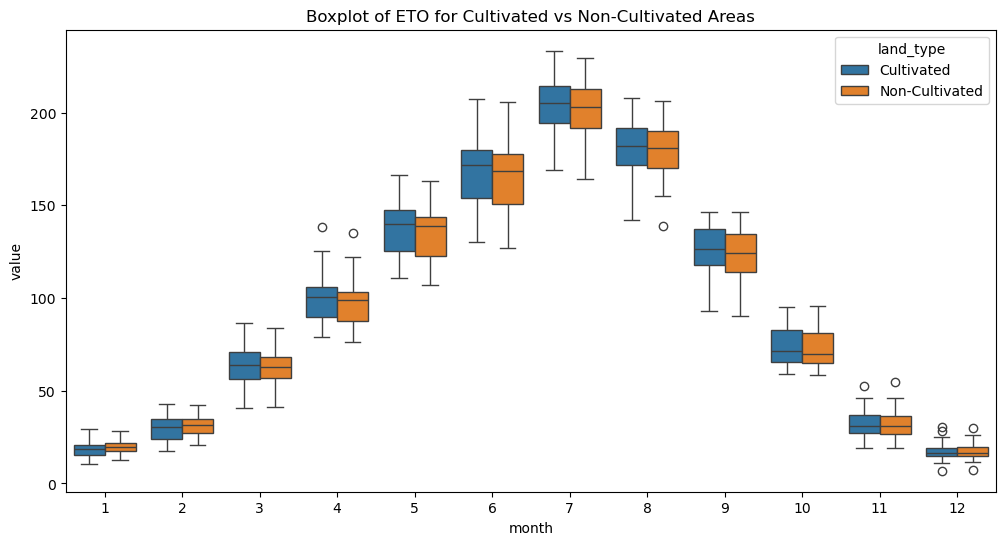

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted[(df_melted['variable'] == 'eto') & (df_melted['UID'] == 103)], 
            x='month', y='value', hue='land_type')
plt.title('Boxplot of ETO for Cultivated vs Non-Cultivated Areas')
plt.show()

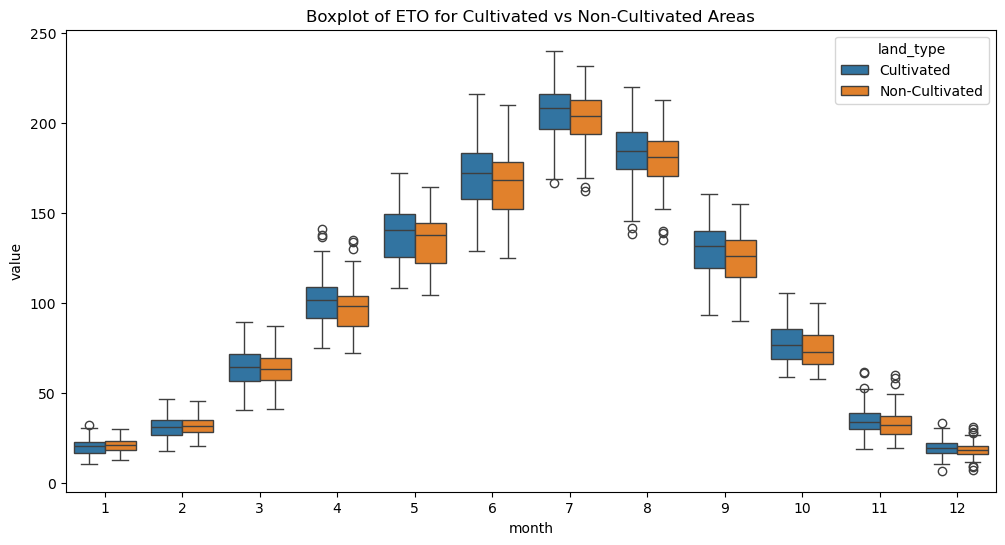

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted[(df_melted['variable'] == 'eto')], 
            x='month', y='value', hue='land_type')
plt.title('Boxplot of ETO for Cultivated vs Non-Cultivated Areas')
plt.show()